In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('/content/Data (1).csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=119.425, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=114.649, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=117.447, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=102.926, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=104.920, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=104.916, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=106.807, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=100.932, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=112.755, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=102.926, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=102.922, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=104.817, Time=0.2

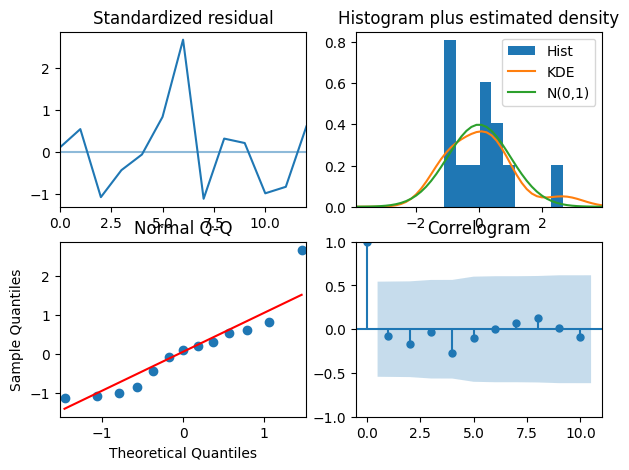

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
#Stepwise ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the sales data
data = pd.read_csv('/content/Data (1).csv', names=['value'], header=0)

In [ ]:
# Define a function to check stationarity
def check_stationarity(data):
    # Perform ADF test
    result = adfuller(data, autolag='AIC')

    # Extract ADF test statistics and p-value
    adf_statistic = result[0]
    p_value = result[1]

    # Define a significance level (e.g., 0.05)
    significance_level = 0.05

    # Check stationarity
    if p_value <= significance_level:
        print(f'ADF Statistic: {adf_statistic}')
        print(f'p-value: {p_value}')
        print('Stationary (reject the null hypothesis)')
    else:
        print(f'ADF Statistic: {adf_statistic}')
        print(f'p-value: {p_value}')
        print('Non-Stationary (fail to reject the null hypothesis)')

# Call the function with your time series data
check_stationarity(data)  # Replace 'column_name' with the name of your data column


ADF Statistic: 0.13942842928178875
p-value: 0.9686522157344223
Non-Stationary (fail to reject the null hypothesis)


In [ ]:
# Define a function to make a time series stationary
def make_stationary(data, lag=1):
    # Compute differences to remove trends
    diff = data - data.shift(lag)

    # Remove NaN values created by differencing
    diff.dropna(inplace=True)

    return diff

# Call the function with your time series data
lag =1  # Adjust the lag value as needed (e.g., for removing seasonality)
stationary_data = make_stationary(data.value, lag=lag)  # Replace 'column_name' with your data column
print(stationary_data)

2      2.0
3      4.0
4     11.0
5     -8.0
6      5.0
7      5.0
8      1.0
9     28.0
10   -10.0
11    15.0
12    19.0
13   -15.0
14    15.0
15    13.0
Name: value, dtype: float64


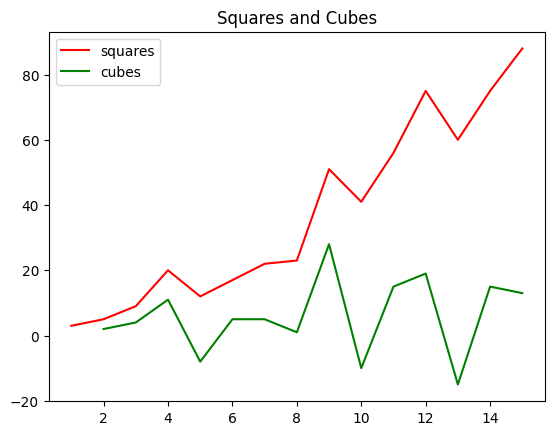

In [ ]:
plt.plot(data, color='red',label='squares')
plt.plot(stationary_data, color='green',label='cubes')

plt.title("Squares and Cubes")
plt.legend()
plt.show()

In [ ]:
# Define a function to check stationarity
def check_stationarity(stationary_data):
    # Perform ADF test
    result = adfuller(stationary_data, autolag='AIC')

    # Extract ADF test statistics and p-value
    adf_statistic = result[0]
    p_value = result[1]

    # Define a significance level (e.g., 0.05)
    significance_level = 0.05

    # Check stationarity
    if p_value <= significance_level:
        print(f'ADF Statistic: {adf_statistic}')
        print(f'p-value: {p_value}')
        print('Stationary (reject the null hypothesis)')
    else:
        print(f'ADF Statistic: {adf_statistic}')
        print(f'p-value: {p_value}')
        print('Non-Stationary (fail to reject the null hypothesis)')

# Call the function with your time series data
check_stationarity(stationary_data)  # Replace 'column_name' with the name of your data column


ADF Statistic: -4.788989537002265
p-value: 5.708586671633049e-05
Stationary (reject the null hypothesis)


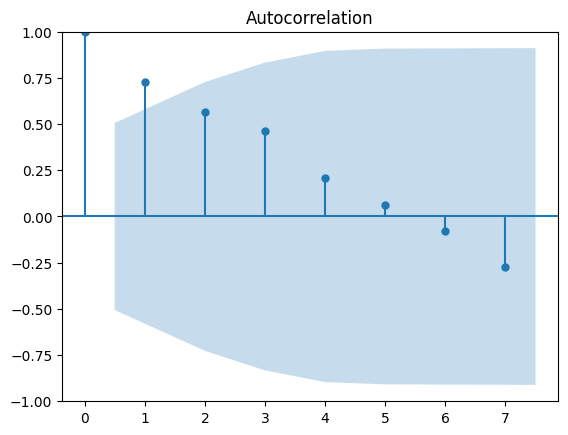

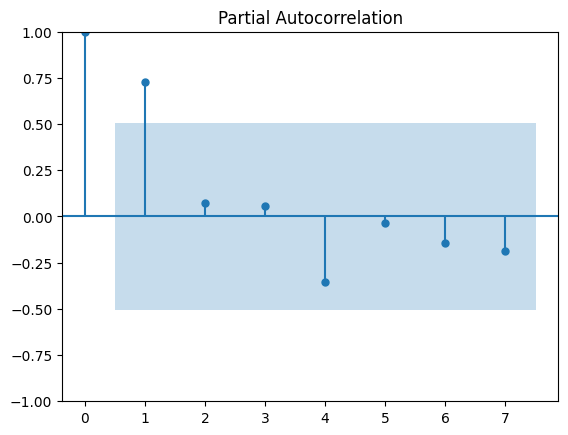

In [ ]:
# ACF and PACF plots
plot_acf(data, lags=7)
plot_pacf(data, lags=7)
plt.show()

In [ ]:
from statsmodels.base.model import Results
#ARIMA Model
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(1,1,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -55.141
Date:                Tue, 26 Mar 2024   AIC                            116.282
Time:                        09:45:55   BIC                            118.199
Sample:                             0   HQIC                           116.104
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.603      1.659      0.097      -0.182       2.181
ma.L1         -0.9956     26.107     -0.038      0.970     -52.164      50.172
sigma2       141.3049   3618.196      0.039      0.9

In [ ]:
from statsmodels.base.model import Results
#ARIMA Model
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(2,2,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   15
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -47.466
Date:                Tue, 26 Mar 2024   AIC                            100.932
Time:                        09:46:37   BIC                            102.627
Sample:                             0   HQIC                           100.584
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1860      0.181     -6.546      0.000      -1.541      -0.831
ar.L2         -0.8400      0.193     -4.358      0.000      -1.218      -0.462
sigma2        69.0792     22.206      3.111      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


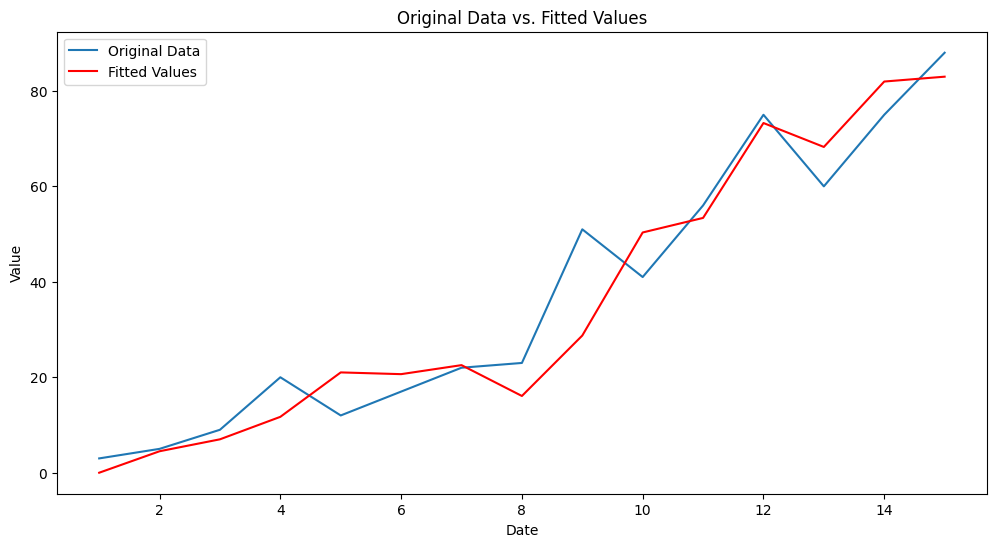

ValueError: too many values to unpack (expected 3)

In [ ]:
# Plot the original data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best')
plt.title('Original Data vs. Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Make forecasts
#forecast_steps = 5  # Number of steps into the future
forecast, stderr, conf_int = results.forecast(steps=5)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(len(data), len(data) + forecast_steps), forecast, color='green', label='Forecast')
plt.fill_between(range(len(data), len(data) + forecast_steps), forecast - stderr, forecast + stderr, color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('Original Data and Forecast')
plt.show()